In [3]:
# Python program to
# demonstrate speed comparison
# between cupy and numpy

# Importing modules
import cupy as cp
import numpy as np
import time

# NumPy and CPU Runtime
s = time.time()
x_cpu = np.ones((1000, 1000, 100))
e = time.time()
print("Time consumed by numpy: ", e - s)

# CuPy and GPU Runtime
s = time.time()
x_gpu = cp.ones((1000, 1000, 100))
e = time.time()
print("\nTime consumed by cupy: ", e - s)

Time consumed by numpy:  0.1870253086090088

Time consumed by cupy:  0.0013043880462646484


Running for N=1000...
Running for N=2000...
Running for N=3000...
Running for N=4000...
Running for N=5000...
Running for N=6000...
Running for N=7000...
Running for N=8000...
Running for N=9000...
Running for N=10000...


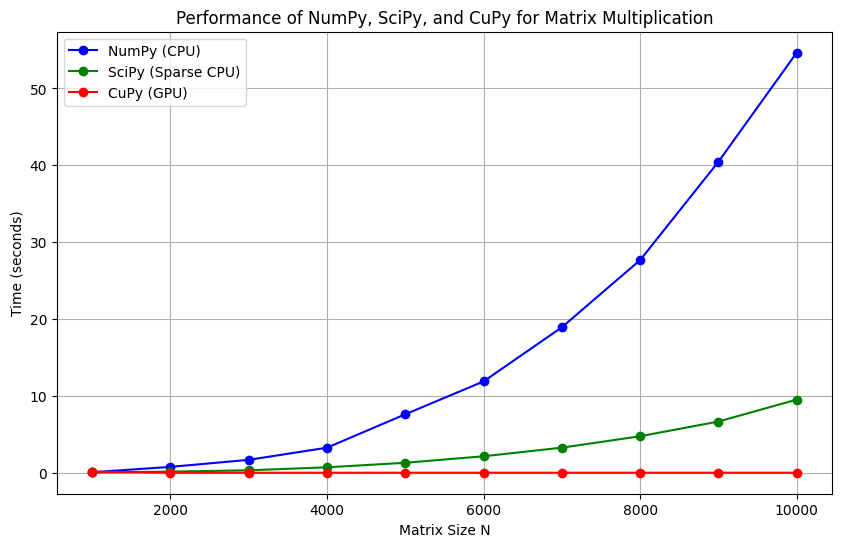

In [4]:
import numpy as np
import cupy as cp
import scipy.sparse as sp
import time
import matplotlib.pyplot as plt

# Function to time matrix multiplication
def time_matrix_multiplication(matrix_a, matrix_b, lib_name):
    start_time = time.time()
    if lib_name == 'numpy':
        result = np.dot(matrix_a, matrix_b)
    elif lib_name == 'cupy':
        result = cp.dot(matrix_a, matrix_b)
    elif lib_name == 'scipy':
        result = sp.csr_matrix(matrix_a).dot(matrix_b)
    end_time = time.time()
    return end_time - start_time

# Initialize lists to store timings
numpy_times = []
scipy_times = []
cupy_times = []
N_values = range(1000, 10001, 1000)  # Vary N from 1000 to 10000

for N in N_values:
    print(f"Running for N={N}...")

    # 1. NumPy
    A_np = np.random.rand(N, N)
    B_np = np.random.rand(N, N)
    time_numpy = time_matrix_multiplication(A_np, B_np, 'numpy')
    numpy_times.append(time_numpy)

    # 2. SciPy (Sparse)
    A_sp = sp.random(N, N, density=0.01, format='csr')  # Sparse matrix for SciPy
    B_sp = np.random.rand(N, N)
    time_scipy = time_matrix_multiplication(A_sp.toarray(), B_sp, 'scipy')
    scipy_times.append(time_scipy)

    # 3. CuPy
    A_cp = cp.random.rand(N, N)
    B_cp = cp.random.rand(N, N)
    time_cupy = time_matrix_multiplication(A_cp, B_cp, 'cupy')
    cupy_times.append(time_cupy)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(N_values, numpy_times, label="NumPy (CPU)", marker='o', color='blue')
plt.plot(N_values, scipy_times, label="SciPy (Sparse CPU)", marker='o', color='green')
plt.plot(N_values, cupy_times, label="CuPy (GPU)", marker='o', color='red')

plt.xlabel("Matrix Size N")
plt.ylabel("Time (seconds)")
plt.title("Performance of NumPy, SciPy, and CuPy for Matrix Multiplication")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()